In [6]:
# gerekli kütüphaneler import edilir

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# veri seti csv dosyasından okunu
data = pd.read_csv('veriseti.csv',sep=",")
#print(data)

# data test veri seti ve training veri seti olmak üzere iki parçaya bölünür.
training_set,test_set = train_test_split(data,test_size=0.2,random_state=1)
#print("train:",training_set)
#print("test:",test_set)

# SVM algoritması için veri seti hazırlanır-> , den sonra iki basamak alınır vs.
x_train = training_set.iloc[:,0:2].values  # data
y_train = training_set.iloc[:,2].values  # target
x_test = test_set.iloc[:,0:2].values  # data
y_test = test_set.iloc[:,2].values  # target
#print(x_train,y_train)
#print(x_test,y_test)

# Modeli eğitilmesi
classifier = SVC(kernel='linear',random_state=1,C=1)
classifier.fit(x_train,y_train)

# x_test verileri üzerinde tahmin gerçekleştirin
y_pred = classifier.predict(x_test)

#test_set['prediction']=y_pred
#print(y_pred)

#  confusion matrix oluşturma ve başarım oranını hesaplama
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy = float(cm.diagonal().sum())/len(y_test)
print('model accuracy is:',accuracy*100,'%')


x1_test = [[73,6]] # yeni data testi için

[[3 0]
 [1 4]]
model accuracy is: 87.5 %


C:\Users\asus\AppData\Local\Temp\ipykernel_34180\1298983488.py:39: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],


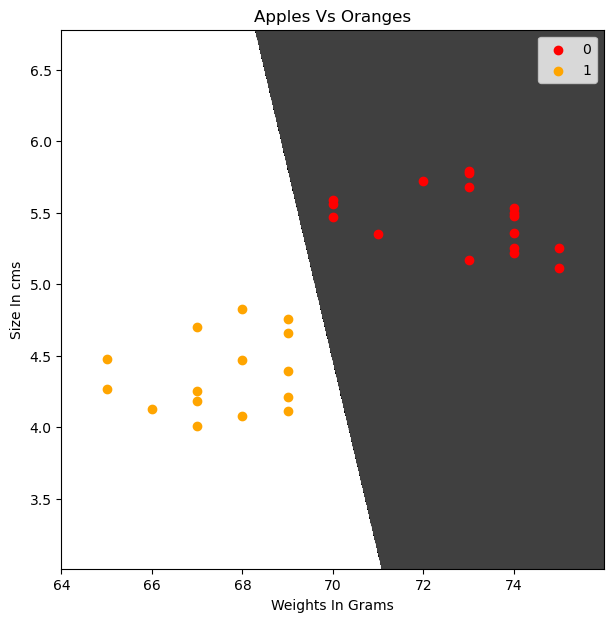

C:\Users\asus\AppData\Local\Temp\ipykernel_34180\1298983488.py:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],


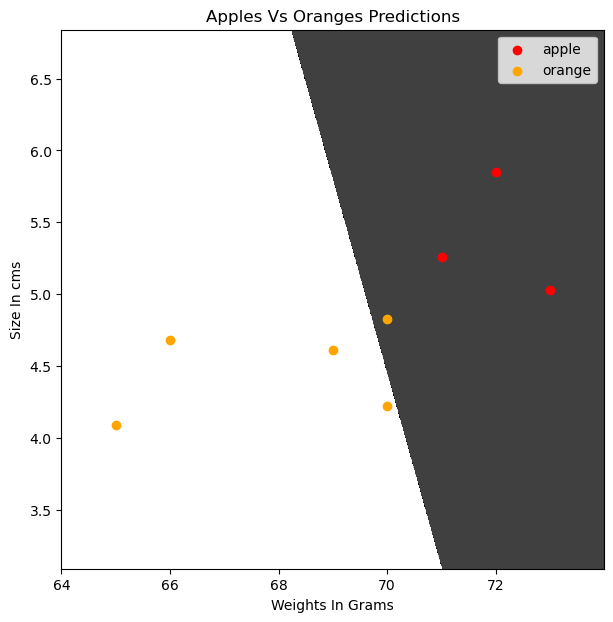

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


data = pd.read_csv('veriseti.csv')
#print(data)
training_set,test_set = train_test_split(data,test_size=0.2,random_state=1)
#print("train:",training_set)
#print("test:",test_set)
x_train = training_set.iloc[:,0:2].values  # veri
y_train = training_set.iloc[:,2].values  # hedef
x_test = test_set.iloc[:,0:2].values  # veri
y_test = test_set.iloc[:,2].values  # hedef

#  labelencoder kullanarakstring değeri integer'a çevirme.
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
#print(y_train)

classifier = SVC(kernel='linear',random_state=1,C=1)
classifier.fit(x_train,y_train)

# Model Eğitimden sonra modelin sınıfladığı verileri görselleştirme
plt.figure(figsize=(7,7))
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75,cmap =
             ListedColormap(('black','white')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],
                x_set[y_set == j,1],
                c =ListedColormap(('red','orange'))(i),
                label = j)

plt.title('Apples Vs Oranges')
plt.xlabel('Weights In Grams')
plt.ylabel('Size In cms')
plt.legend()
plt.show()

# Tahminleri görselleştirme
plt.figure(figsize=(7,7))
x_set,y_set = x_test,y_test
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75,cmap =
             ListedColormap(('black','white')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],
                x_set[y_set == j,1],
                c =ListedColormap(('red','orange'))(i),
                label = j)

plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weights In Grams')
plt.ylabel('Size In cms')
plt.legend()
plt.show()